In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# Korelasyon Yöntemi 

In [4]:
df = pd.read_csv("data.csv").copy()
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


## Boş bırakılmış özellik Kontrolü

In [5]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [6]:
df[0]

KeyError: 0

## Data Hakkında Bilgi Edinme

In [ ]:
df.hist(figsize = (10,10))

## Data Temizleme İşlemleri

In [7]:
del df["artists"]
del df["id"]
del df["release_date"]
index = df.iloc[:,12]
del df["name"]
del df["duration_ms"]
df.head()


,valence,year,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


In [8]:
df['key'] = pd.Categorical(df['key'])
dfDummies = pd.get_dummies(df['key'], prefix = 'key')
df = pd.concat([df, dfDummies], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   valence           170653 non-null  float64 
 1   year              170653 non-null  int64   
 2   acousticness      170653 non-null  float64 
 3   danceability      170653 non-null  float64 
 4   energy            170653 non-null  float64 
 5   explicit          170653 non-null  int64   
 6   instrumentalness  170653 non-null  float64 
 7   key               170653 non-null  category
 8   liveness          170653 non-null  float64 
 9   loudness          170653 non-null  float64 
 10  mode              170653 non-null  int64   
 11  popularity        170653 non-null  int64   
 12  speechiness       170653 non-null  float64 
 13  tempo             170653 non-null  float64 
 14  key_0             170653 non-null  uint8   
 15  key_1             170653 non-null  uint8   
 16  ke

In [9]:
del df["key"]
df.index = index
df.index.name = None

## Datayı Normalize Etmek

In [15]:
import pandas as pd
from sklearn import preprocessing

x = df.values 
print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

[[5.940e-02 1.921e+03 9.820e-01 ... 0.000e+00 1.000e+00 0.000e+00]
 [9.630e-01 1.921e+03 7.320e-01 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.940e-02 1.921e+03 9.610e-01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [6.370e-01 2.020e+03 1.010e-01 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.950e-01 2.020e+03 9.980e-03 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.420e-01 2.020e+03 1.320e-01 ... 0.000e+00 0.000e+00 0.000e+00]]


In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0594,0.0,0.985944,0.282389,0.211,0.0,0.878000,0.665,0.624916,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.9630,0.0,0.734940,0.828947,0.341,0.0,0.000000,0.160,0.744797,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0394,0.0,0.964859,0.331984,0.166,0.0,0.913000,0.101,0.707071,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1650,0.0,0.970884,0.278340,0.309,0.0,0.000028,0.381,0.793736,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2530,0.0,0.960843,0.423077,0.193,0.0,0.000002,0.229,0.781521,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.rename(columns={0: 'valence',1:"year", 2 :"acousticness" ,3 : "danceability",4:"energy",5:"explicit",6:"instrumentalness",7:"liveness",8:"loudness",9:"mode",10:"popularity",11:"speechiness",12:"tempo",13:"key_1",14:"key_2",15:"key_3",16:"key_4",17:"key_5",18:"key_6",19:"key_7",20:"key_8",21:"key_9",22:"key_10",23:"key_11",24:"key_12"}, inplace=True)

In [18]:
df.index = index
df.index.name = None

## Heatmap Oluşturmak

In [19]:
from heatmap import heatmap, corrplot

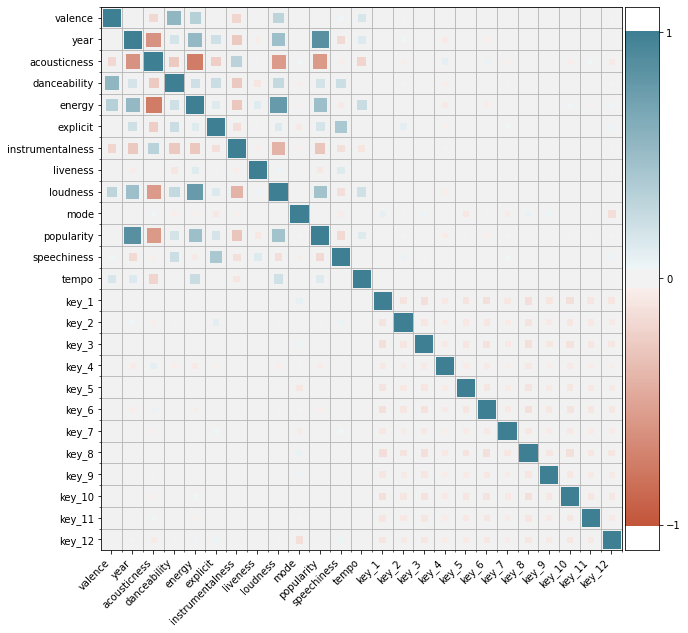

In [20]:
plt.figure(figsize=(10, 10))
corrplot(df.corr(), size_scale=300);

## Özellik Seçimi

In [21]:
df_new = pd.DataFrame(df , columns =['year', 'acousticness','energy','loudness','popularity','valence','danceability']) 

In [22]:
df_new

,year,acousticness,energy,loudness,popularity,valence,danceability
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.0,0.985944,0.211,0.624916,0.04,0.0594,0.282389
Clancy Lowered the Boom,0.0,0.734940,0.341,0.744797,0.05,0.9630,0.828947
Gati Bali,0.0,0.964859,0.166,0.707071,0.05,0.0394,0.331984
Danny Boy,0.0,0.970884,0.309,0.793736,0.03,0.1650,0.278340
When Irish Eyes Are Smiling,0.0,0.960843,0.193,0.781521,0.02,0.2530,0.423077
...,...,...,...,...,...,...,...
China,1.0,0.084940,0.808,0.881654,0.72,0.6080,0.795547
Halloweenie III: Seven Days,1.0,0.206827,0.753,0.845353,0.68,0.7340,0.725709
AYA,1.0,0.101406,0.858,0.904769,0.76,0.6370,0.641700
Darkness,1.0,0.010020,0.623,0.827484,0.70,0.1950,0.679150


## Elbow Yöntemi ile sınıf tahmini

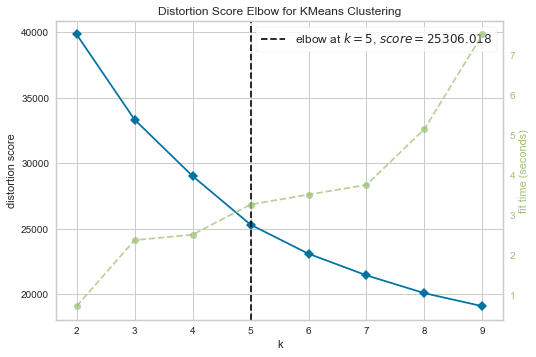

In [23]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2,10))
visualizer.fit(df_new)
visualizer.poof()

## K-Means Yöntemi Uygulama ve Görselleştirme

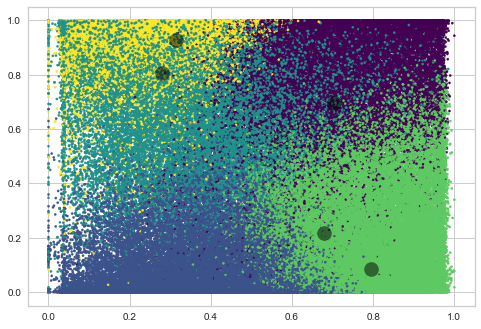

In [26]:
k_fit = kmeans.fit(df_new)
kmeans = KMeans(n_clusters = 5)
kumeler = k_fit.labels_
plt.scatter(df.iloc[:,0],df.iloc[:,2],c= kumeler,s = 5,cmap = "viridis" )

merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1],s = 200,c="black",alpha = 0.5)

## Kümedeki örnek Sayılarını Bulma

In [27]:
kumeler
import collections, numpy
unique, counts = numpy.unique(kumeler, return_counts=True)
dict(zip(unique, counts))

{0: 36518, 1: 36824, 2: 26370, 3: 43263, 4: 27678}

In [28]:
df_new

,year,acousticness,energy,loudness,popularity,valence,danceability
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.0,0.985944,0.211,0.624916,0.04,0.0594,0.282389
Clancy Lowered the Boom,0.0,0.734940,0.341,0.744797,0.05,0.9630,0.828947
Gati Bali,0.0,0.964859,0.166,0.707071,0.05,0.0394,0.331984
Danny Boy,0.0,0.970884,0.309,0.793736,0.03,0.1650,0.278340
When Irish Eyes Are Smiling,0.0,0.960843,0.193,0.781521,0.02,0.2530,0.423077
...,...,...,...,...,...,...,...
China,1.0,0.084940,0.808,0.881654,0.72,0.6080,0.795547
Halloweenie III: Seven Days,1.0,0.206827,0.753,0.845353,0.68,0.7340,0.725709
AYA,1.0,0.101406,0.858,0.904769,0.76,0.6370,0.641700
Darkness,1.0,0.010020,0.623,0.827484,0.70,0.1950,0.679150


## Kumelerden Örnek Toplama

In [29]:
a =pd.DataFrame({"year":df_new["year"],"acousticness":df_new["acousticness"],"energy":df_new["energy"],"loudness":df_new["loudness"],"popularity":df_new["popularity"],"valence":df_new["valence"],"danceability":df_new["danceability"],"Kumeler":kumeler})

In [30]:
a.loc[a['Kumeler'] == 4][200:210]

,year,acousticness,energy,loudness,popularity,valence,danceability,Kumeler
The Song Is You,0.040404,0.804217,0.3860,0.768444,0.02,0.324,0.225709,4
Daybreak,0.040404,0.941767,0.3790,0.809067,0.02,0.290,0.275304,4
Do I Worry?,0.040404,0.985944,0.1650,0.707086,0.03,0.120,0.401822,4
"I Just Couldn't Make It, Baby",0.040404,0.988956,0.1570,0.737045,0.03,0.415,0.486842,4
East Of The Sun,0.040404,0.950803,0.1270,0.724892,0.02,0.436,0.620445,4
I Could Make You Care,0.040404,0.925703,0.2150,0.746535,0.03,0.312,0.303644,4
My Kind Of Man,0.040404,0.993976,0.1490,0.746645,0.04,0.505,0.473684,4
Destellos - Remasterizado,0.040404,0.998996,0.0771,0.570840,0.00,0.512,0.541498,4
Quereme Serrana - Remasterizado,0.040404,1.000000,0.2700,0.716827,0.00,0.187,0.425101,4
"Carmen, 14, Acte 2: ""La Fleur Que Tu M'avais Jetée""",0.040404,0.994980,0.0307,0.609490,0.00,0.159,0.324899,4


In [132]:
?kumeler

Type:            ndarray
String form:     [4 1 4 ... 2 2 0]
Length:          170653
File:            c:\users\utkuu\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:       <no docstring>
Class docstring:
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape 

In [38]:
a

,year,acousticness,energy,loudness,popularity,valence,danceability,Kumeler
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.0,0.985944,0.211,0.624916,0.04,0.0594,0.282389,4
Clancy Lowered the Boom,0.0,0.734940,0.341,0.744797,0.05,0.9630,0.828947,0
Gati Bali,0.0,0.964859,0.166,0.707071,0.05,0.0394,0.331984,4
Danny Boy,0.0,0.970884,0.309,0.793736,0.03,0.1650,0.278340,4
When Irish Eyes Are Smiling,0.0,0.960843,0.193,0.781521,0.02,0.2530,0.423077,4
...,...,...,...,...,...,...,...,...
China,1.0,0.084940,0.808,0.881654,0.72,0.6080,0.795547,1
Halloweenie III: Seven Days,1.0,0.206827,0.753,0.845353,0.68,0.7340,0.725709,3
AYA,1.0,0.101406,0.858,0.904769,0.76,0.6370,0.641700,1
Darkness,1.0,0.010020,0.623,0.827484,0.70,0.1950,0.679150,1


In [56]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# PCA yöntemi ile Sınıflandırma

## Veri temizleme ve işlemeye hazır hale getirme

In [47]:
df = pd.read_csv("data.csv").copy()
df.head()
del df["artists"]
del df["id"]
del df["release_date"]
index = df.iloc[:,12]
del df["name"]
del df["duration_ms"]
df.head()
df['key'] = pd.Categorical(df['key'])
dfDummies = pd.get_dummies(df['key'], prefix = 'key')
df = pd.concat([df, dfDummies], axis=1)
df.info()
del df["key"]
df.index = index
df.index.name = None
import pandas as pd
from sklearn import preprocessing

x = df.values 
print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.rename(columns={0: 'valence',1:"year", 2 :"acousticness" ,3 : "danceability",4:"energy",5:"explicit",6:"instrumentalness",7:"liveness",8:"loudness",9:"mode",10:"popularity",11:"speechiness",12:"tempo",13:"key_1",14:"key_2",15:"key_3",16:"key_4",17:"key_5",18:"key_6",19:"key_7",20:"key_8",21:"key_9",22:"key_10",23:"key_11",24:"key_12"}, inplace=True)
df.index = index
df.index.name = None
df_pca = pd.DataFrame(df , columns =['year', 'acousticness','energy','loudness','popularity','valence','danceability','instrumentalness','liveness','valence','speechiness','tempo']) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   valence           170653 non-null  float64 
 1   year              170653 non-null  int64   
 2   acousticness      170653 non-null  float64 
 3   danceability      170653 non-null  float64 
 4   energy            170653 non-null  float64 
 5   explicit          170653 non-null  int64   
 6   instrumentalness  170653 non-null  float64 
 7   key               170653 non-null  category
 8   liveness          170653 non-null  float64 
 9   loudness          170653 non-null  float64 
 10  mode              170653 non-null  int64   
 11  popularity        170653 non-null  int64   
 12  speechiness       170653 non-null  float64 
 13  tempo             170653 non-null  float64 
 14  key_0             170653 non-null  uint8   
 15  key_1             170653 non-null  uint8   
 16  ke

In [48]:
df

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,key_12
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.0594,0.0,0.985944,0.282389,0.211,0.0,0.878000,0.6650,0.624916,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Clancy Lowered the Boom,0.9630,0.0,0.734940,0.828947,0.341,0.0,0.000000,0.1600,0.744797,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Gati Bali,0.0394,0.0,0.964859,0.331984,0.166,0.0,0.913000,0.1010,0.707071,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Danny Boy,0.1650,0.0,0.970884,0.278340,0.309,0.0,0.000028,0.3810,0.793736,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
When Irish Eyes Are Smiling,0.2530,0.0,0.960843,0.423077,0.193,0.0,0.000002,0.2290,0.781521,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,0.6080,1.0,0.084940,0.795547,0.808,0.0,0.000289,0.0822,0.881654,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Halloweenie III: Seven Days,0.7340,1.0,0.206827,0.725709,0.753,0.0,0.000000,0.1010,0.845353,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AYA,0.6370,1.0,0.101406,0.641700,0.858,0.0,0.000009,0.2580,0.904769,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Darkness,0.1950,1.0,0.010020,0.679150,0.623,1.0,0.000008,0.6430,0.827484,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standardizayon ve  PCA yöntemi Ugulama

In [49]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df_pca)
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca_fit = pca.fit_transform(df_pca)
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen", "ikinci_bilesen","ucuncu bilesen","dorduncu_bilesen"])

## Verinin ne kadarının betimlendiğini görmek

In [51]:
pca.explained_variance_ratio_

array([0.42284064, 0.21205981, 0.11727157, 0.07428332])

## Grafik ile belli varsayımalra göre komponent sayısına karar verme

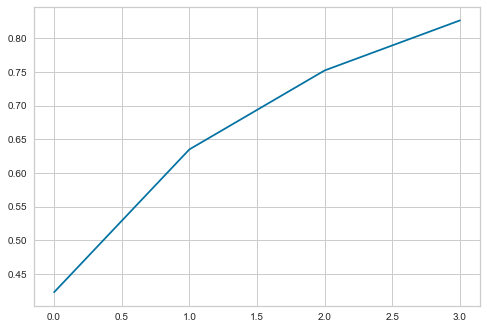

In [50]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

## Elbow Yöntemi ile sınıf Tahmini

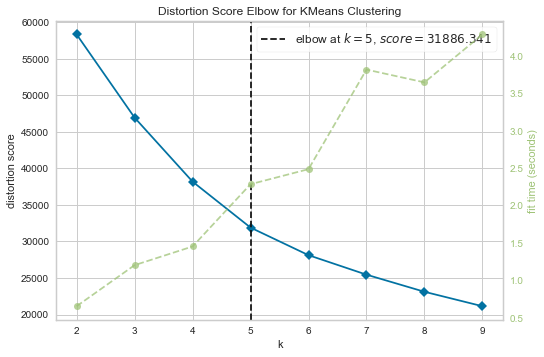

In [52]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2,10))
visualizer.fit(bilesen_df)
visualizer.poof()

## Komponentlere k-mean uygulama ve görselleştirilmesi

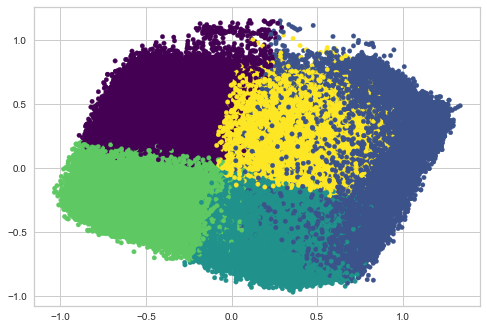

In [54]:
k_fit = kmeans.fit(bilesen_df)
kmeans = KMeans(n_clusters = 5)
kumeler = k_fit.labels_
plt.scatter(bilesen_df.iloc[:,0],bilesen_df.iloc[:,1],c= kumeler,s = 20,cmap = "viridis" )

## Kumelerdeki eleman sayısını öğrenme

In [55]:
import collections, numpy
unique, counts = numpy.unique(kumeler, return_counts=True)
dict(zip(unique, counts))

{0: 38205, 1: 23040, 2: 32459, 3: 46613, 4: 30336}

## 3 Boyutlu Görselleştirme

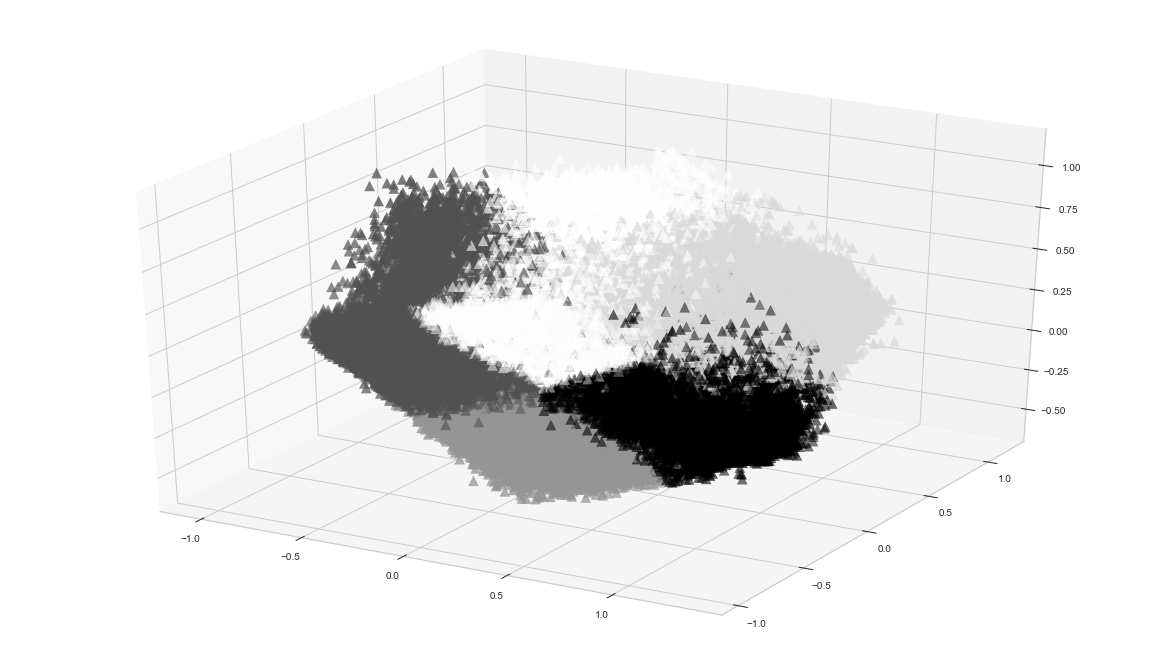

In [60]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(bilesen_df.iloc[:,0],bilesen_df.iloc[:,1],bilesen_df.iloc[:,2], c =kumeler,s=100,marker='^')
ax.scatter(merkezler[:,0],merkezler[:,1],merkezler[:,2],s = 200,alpha = 0.5)